In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from prophet import Prophet 

/Users/arturopolancolozano/opt/anaconda3/envs/robot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data =  pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'
)

data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Text(0, 0.5, '# Users')

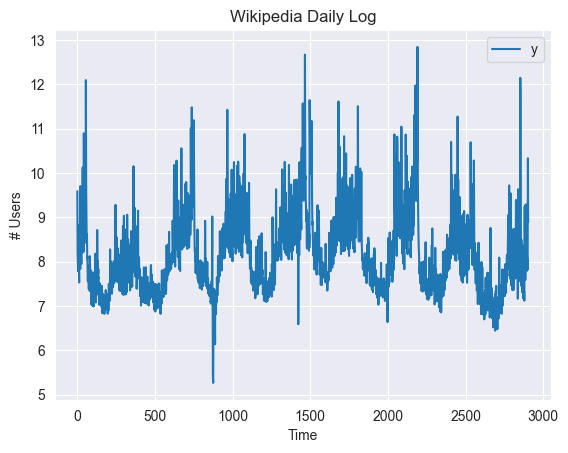

In [3]:
data.plot()
plt.title("Wikipedia Daily Log")
plt.xlabel("Time")
plt.ylabel("# Users")

In [4]:
model = Prophet()
model.fit(data)

08:38:53 - cmdstanpy - INFO - Chain [1] start processing
08:38:54 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# predictions are only made on a dataframe containing dates
# generating prediction dataframe with dates
future_df = model.make_future_dataframe(periods=365)
future_df.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [6]:
# passing dataframe with dates to the model
forecast = model.predict(future_df)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.843389,8.204656,9.439763
1,2007-12-11,8.591942,7.957944,9.222064
2,2007-12-12,8.387763,7.773616,8.986999
3,2007-12-13,8.365672,7.723149,9.010953
4,2007-12-14,8.353642,7.758772,8.963132


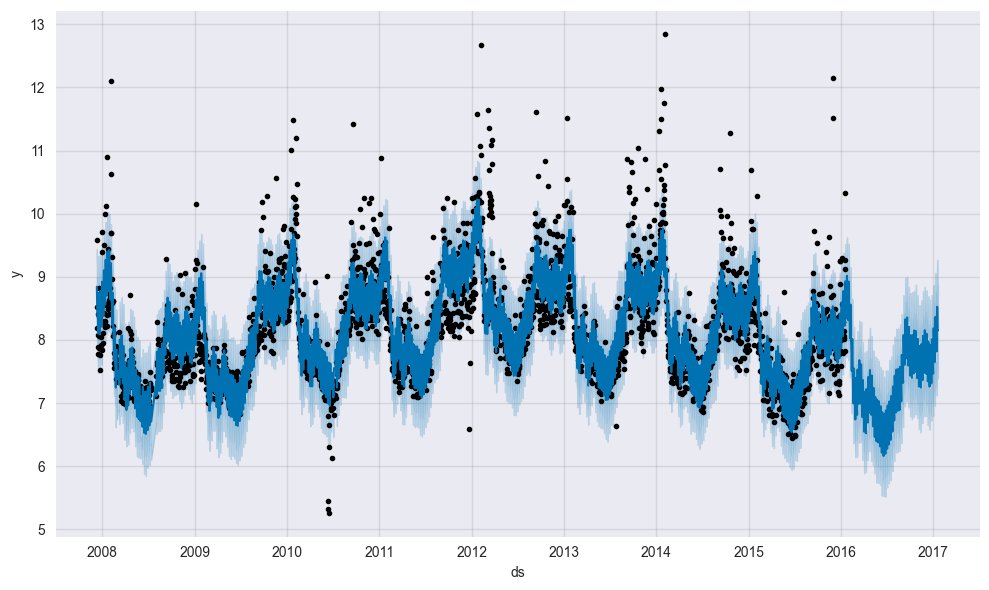

In [7]:
fig_one = model.plot(forecast)

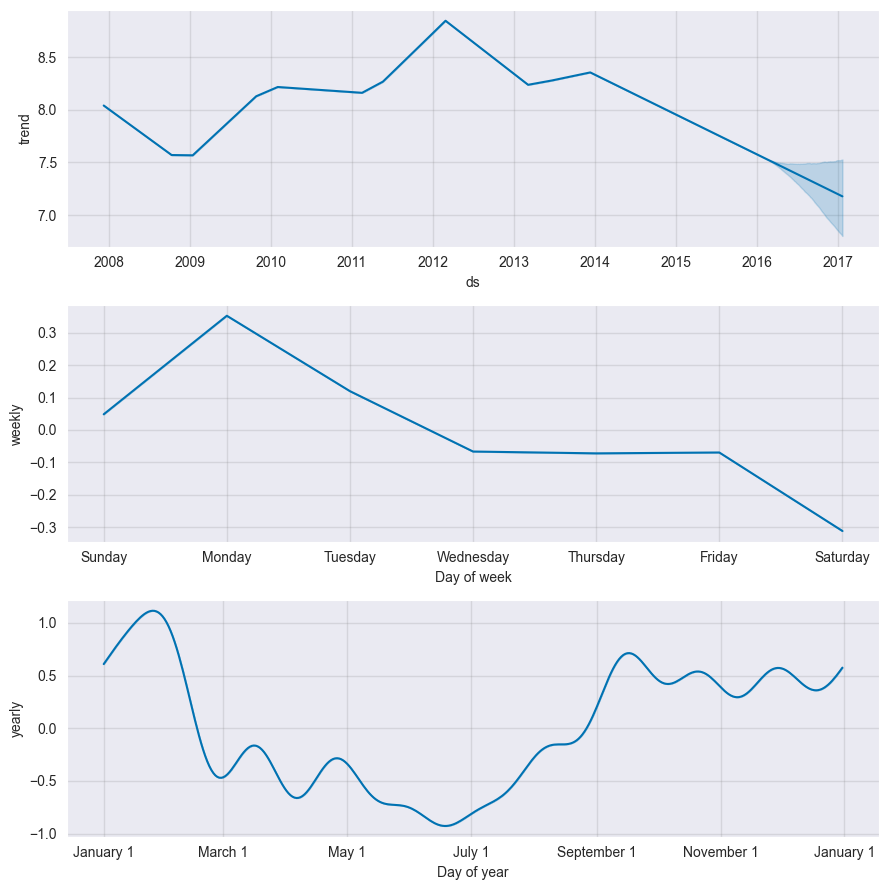

In [8]:
fig_two  = model.plot_components(forecast)

In [9]:
from prophet.plot import plot_plotly#, plot_components_plotly

plot_plotly(model, forecast)